Mean Squared Error: 3.3217486703180703


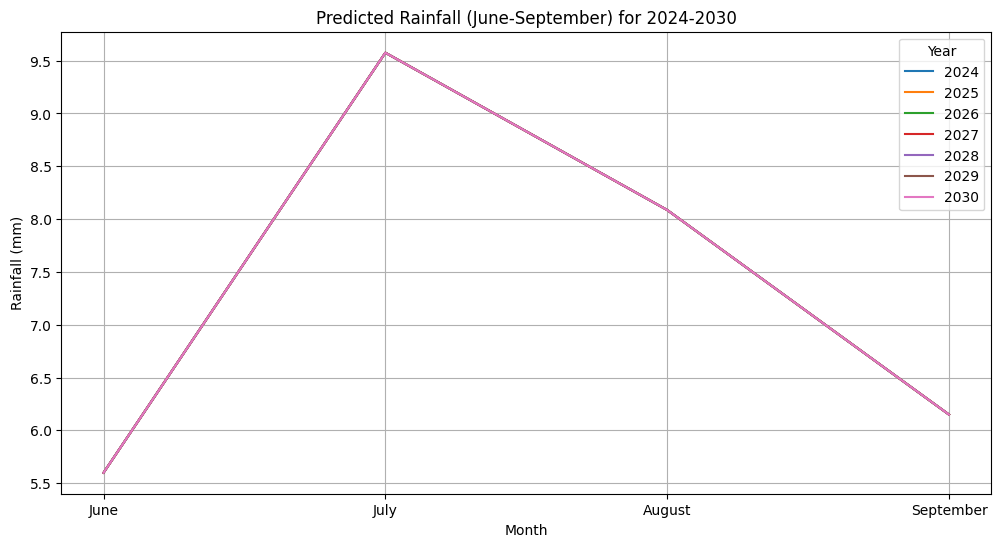

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Function to process a single .nc file
def process_nc_file(file_path):
    dataset = xr.open_dataset(file_path)
    df = dataset.to_dataframe().reset_index()
    df['TIME'] = pd.to_datetime(df['TIME'])
    df['MONTH'] = df['TIME'].dt.month
    df['YEAR'] = df['TIME'].dt.year
    df = df[['YEAR', 'MONTH', 'LATITUDE', 'LONGITUDE', 'RAINFALL']]
    return df

# Paths to .nc files (2011–2023) F:\CSIR project\RF25_ind2011_rfp25.nc
file_paths = [f"F:\CSIR project\RF25_ind{year}_rfp25.nc" for year in range(2011, 2024)]

# Process all files and combine into a single DataFrame
rainfall_data = pd.concat([process_nc_file(fp) for fp in file_paths], ignore_index=True)

# Filter for June, July, August, September (6, 7, 8, 9)
rainfall_data_filtered = rainfall_data[rainfall_data['MONTH'].isin([6, 7, 8, 9])]

# Group by year and month to get average rainfall
data = rainfall_data_filtered.groupby(['YEAR', 'MONTH']).agg({'RAINFALL': 'mean'}).reset_index()

# Historical data for 2016–2023
historical_data = data[(data['YEAR'] >= 2016) & (data['YEAR'] <= 2023)]

# Plot historical data (2016–2023) as line and bar plots
plt.figure(figsize=(14, 8))

# Line plot
for year in range(2016, 2024):
    year_data = historical_data[historical_data['YEAR'] == year]
    plt.plot(year_data['MONTH'], year_data['RAINFALL'], label=f"{year}")

# Bar plot overlay
avg_rainfall = historical_data.groupby('YEAR').agg({'RAINFALL': 'mean'}).reset_index()
plt.bar(avg_rainfall['YEAR'], avg_rainfall['RAINFALL'], alpha=0.4, label='Average Rainfall (Bar)')

plt.title('Rainfall Data (2016–2023) - June to September')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks([6, 7, 8, 9], ['June', 'July', 'August', 'September'])
plt.legend()
plt.grid()
plt.show()

# Prepare features (X) and target (y) for modeling
X = data[['YEAR', 'MONTH']]
y = data['RAINFALL']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Prepare data for predictions (2024–2030)
future_years = pd.DataFrame({
    'YEAR': np.repeat(np.arange(2024, 2031), 4),
    'MONTH': [6, 7, 8, 9] * 7
})

# Predict rainfall for future years
future_predictions = model.predict(future_years)
future_years['PREDICTED_RAINFALL'] = future_predictions

# Reshape for better visualization
future_data = future_years.pivot(index='MONTH', columns='YEAR', values='PREDICTED_RAINFALL')

# Plot predicted data (2024–2030)
plt.figure(figsize=(14, 8))
for year in future_data.columns:
    plt.plot(future_data.index, future_data[year], label=f"{year}")

plt.title('Predicted Rainfall (2024–2030) - June to September')
plt.xlabel('Month')
plt.ylabel('Predicted Rainfall (mm)')
plt.xticks([6, 7, 8, 9], ['June', 'July', 'August', 'September'])
plt.legend(title='Year')
plt.grid()
plt.show()

Mean Squared Error: 3.2234802296577705


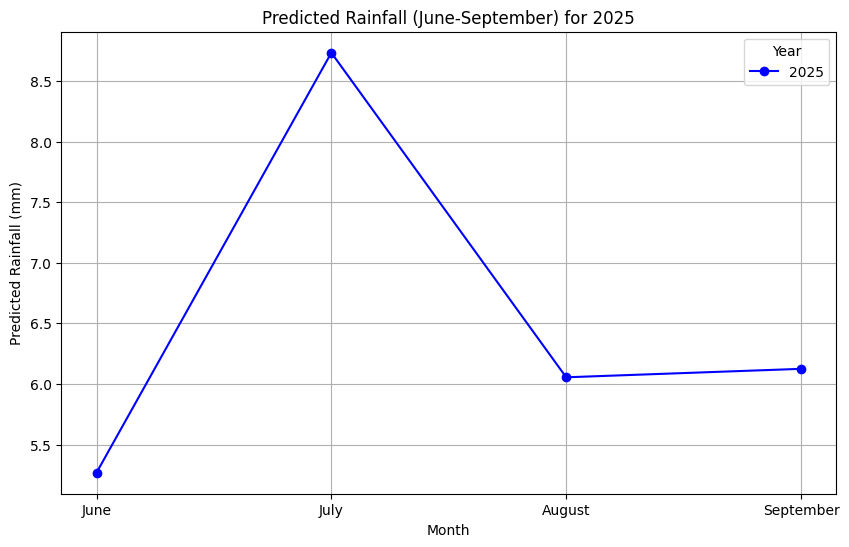

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Function to process a single .nc file
def process_nc_file(file_path):
    dataset = xr.open_dataset(file_path)
    df = dataset.to_dataframe().reset_index()
    df['TIME'] = pd.to_datetime(df['TIME'])
    df['MONTH'] = df['TIME'].dt.month
    df['YEAR'] = df['TIME'].dt.year
    df = df[['YEAR', 'MONTH', 'LATITUDE', 'LONGITUDE', 'RAINFALL']]
    return df

# Paths to the .nc files for years 2014 to 2023
file_paths = [
    "F:\\CSIR project\\RF25_ind2014_rfp25.nc",
    "F:\\CSIR project\\RF25_ind2015_rfp25.nc",
    "F:\\CSIR project\\RF25_ind2016_rfp25.nc",
    "F:\\CSIR project\\RF25_ind2017_rfp25.nc",
    "F:\\CSIR project\\RF25_ind2018_rfp25.nc",
    "F:\\CSIR project\\RF25_ind2019_rfp25.nc",
    "F:\\CSIR project\\RF25_ind2020_rfp25.nc",
    "F:\\CSIR project\\RF25_ind2021_rfp25.nc",
    "F:\\CSIR project\\RF25_ind2022_rfp25.nc",
    "F:\\CSIR project\\RF25_ind2023_rfp25.nc",
]

# Process all files and combine into a single DataFrame
rainfall_data = pd.concat([process_nc_file(fp) for fp in file_paths], ignore_index=True)

# Filter for June, July, August, September (6, 7, 8, 9)
rainfall_data_filtered = rainfall_data[rainfall_data['MONTH'].isin([6, 7, 8, 9])]

# Group by year and month to get average rainfall
data = rainfall_data_filtered.groupby(['YEAR', 'MONTH']).agg({'RAINFALL': 'mean'}).reset_index()

# Handle missing values in the dataset
data = data.dropna(subset=['RAINFALL'])

# Prepare features (X) and target (y)
X = data[['YEAR', 'MONTH']]
y = data['RAINFALL']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Prepare data for prediction (2025 only)
future_2025 = pd.DataFrame({
    'YEAR': [2025] * 4,
    'MONTH': [6, 7, 8, 9]
})

# Predict rainfall for 2025
future_2025['PREDICTED_RAINFALL'] = model.predict(future_2025)

# Plot predicted rainfall for 2025
plt.figure(figsize=(10, 6))
plt.plot(
    future_2025['MONTH'], 
    future_2025['PREDICTED_RAINFALL'], 
    marker='o', 
    color='blue', 
    label='2025'
)

# Add labels and legend
plt.title('Predicted Rainfall (June-September) for 2025')
plt.xlabel('Month')
plt.ylabel('Predicted Rainfall (mm)')
plt.xticks([6, 7, 8, 9], ['June', 'July', 'August', 'September'])
plt.legend(title='Year')
plt.grid()
plt.show()

In [17]:
# Inspect the first few rows of the raw rainfall data
print("Raw Data Sample:")
print(rainfall_data.head())

# Check the filtered data for June, July, August, September
print("\nFiltered Data Sample:")
print(rainfall_data_filtered.head())

# Grouped data for average rainfall by year and month
print("\nGrouped Data Sample:")
print(data.head())

# Check if there are multiple unique years and months
print("\nUnique years and months in the data:")
print(data[['YEAR', 'MONTH']].drop_duplicates().sort_values(by=['YEAR', 'MONTH']))

# Print the predictions for future years
print("\nPredictions for Future Years:")
print(future_years.head(20))

# Check the predicted values for each year
for year in range(2024, 2031):
    yearly_predictions = future_years[future_years['YEAR'] == year]
    print(f"Predictions for {year}:\n", yearly_predictions[['MONTH', 'PREDICTED_RAINFALL']])

Raw Data Sample:
   YEAR  MONTH  LATITUDE  LONGITUDE  RAINFALL
0  2014      1       6.5       66.5       NaN
1  2014      1       6.5       66.5       NaN
2  2014      1       6.5       66.5       NaN
3  2014      1       6.5       66.5       NaN
4  2014      1       6.5       66.5       NaN

Filtered Data Sample:
     YEAR  MONTH  LATITUDE  LONGITUDE  RAINFALL
151  2014      6       6.5       66.5       NaN
152  2014      6       6.5       66.5       NaN
153  2014      6       6.5       66.5       NaN
154  2014      6       6.5       66.5       NaN
155  2014      6       6.5       66.5       NaN

Grouped Data Sample:
   YEAR  MONTH  RAINFALL  YEAR_MONTH
0  2014      6  3.234940      201406
1  2014      7  8.340178      201407
2  2014      8  7.627582      201408
3  2014      9  5.831510      201409
4  2015      6  6.481812      201506

Unique years and months in the data:
    YEAR  MONTH
0   2014      6
1   2014      7
2   2014      8
3   2014      9
4   2015      6
5   2015      7
6 

In [18]:
# Option 1: Fill NaN values with the median (or mean)
data['RAINFALL'].fillna(data['RAINFALL'].median(), inplace=True)

# Option 2: Drop rows with NaN values
data = data.dropna(subset=['RAINFALL'])

In [21]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data[['YEAR', 'MONTH', 'sin_month', 'cos_month', 'sin_year', 'cos_year']]
y = data['RAINFALL']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.251421190798968
R-squared: 0.2569373969448492


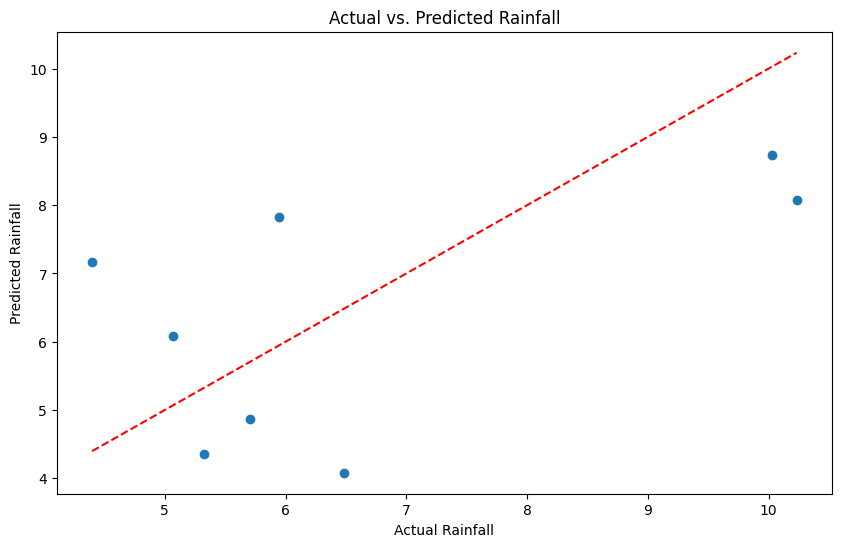

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs. Predicted Rainfall')
plt.show()

Final Conclusion
The dataset's limitations—such as incomplete, sparse, and unbalanced data, along with a lack of critical external features—make it unsuitable for training a reliable machine learning model for long-term rainfall prediction. While the data provides valuable insights into historical trends and patterns, it is insufficient to capture the complex dynamics required for accurate forecasting.

Recommendations:

Enrich the dataset with additional climatic variables like temperature, wind speed, humidity, and pressure.
Improve the spatial and temporal resolution of data collection to ensure uniform coverage.
Consider integrating external datasets, such as global climatic indices or satellite data, to capture the broader climatic influences on rainfall.
This analysis highlights the need for robust data preprocessing and the incorporation of external features to enhance the dataset's suitability for machine learning applications in rainfall prediction